<a href="https://colab.research.google.com/github/shamanthguduru/sguduru5_MachineLearning./blob/main/Assingment-2_neuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import tensorflow as tf
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import pandas as pd

# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Preprocess the data (pad sequences to make them the same length)
x_train = pad_sequences(train_data, maxlen=256)
y_train = train_labels
x_test = pad_sequences(test_data, maxlen=256)
y_test = test_labels


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:

# Function to build models with different configurations
def build_model(hidden_layers=2, hidden_units=32, loss_function="binary_crossentropy", activation="relu",
                dropout_rate=0.3, optimizer="adam", batch_size=256, use_l2=False):
    model = models.Sequential()
    reg = regularizers.l2(0.001) if use_l2 else None

    model.add(layers.Dense(hidden_units, activation=activation, kernel_regularizer=reg, input_shape=(256,)))
    model.add(layers.Dropout(dropout_rate))

    for _ in range(hidden_layers - 1):
        model.add(layers.Dense(hidden_units, activation=activation, kernel_regularizer=reg))
        model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(1, activation="sigmoid"))

    model.compile(optimizer=optimizer, loss=loss_function, metrics=["accuracy"])

    history = model.fit(x_train, y_train, epochs=20, batch_size=batch_size, validation_data=(x_test, y_test), verbose=1)
    return history

# List to store histories for comparison
histories = {}

# One hidden layer with ReLU and dropout
histories["one_hidden_layer_relu"] = build_model(hidden_layers=1, activation="relu", dropout_rate=0.3)

# One hidden layer with Tanh and dropout
histories["one_hidden_layer_tanh"] = build_model(hidden_layers=1, activation="tanh", dropout_rate=0.3)

# Three hidden layers with ReLU and dropout
histories["three_hidden_layers_relu"] = build_model(hidden_layers=3, activation="relu", dropout_rate=0.3)

# Three hidden layers with Tanh and dropout
histories["three_hidden_layers_tanh"] = build_model(hidden_layers=3, activation="tanh", dropout_rate=0.3)

# More hidden units (64) with ReLU and dropout
histories["more_hidden_units_relu"] = build_model(hidden_units=64, activation="relu", dropout_rate=0.3)

# More hidden units (64) with Tanh and dropout
histories["more_hidden_units_tanh"] = build_model(hidden_units=64, activation="tanh", dropout_rate=0.3)

# MSE loss function with ReLU and dropout
histories["mse_loss_relu"] = build_model(loss_function="mse", activation="relu", dropout_rate=0.3)

# MSE loss function with Tanh and dropout
histories["mse_loss_tanh"] = build_model(loss_function="mse", activation="tanh", dropout_rate=0.3)

# Model with L2 Regularization (ReLU)
histories["l2_regularization_relu"] = build_model(use_l2=True, activation="relu", dropout_rate=0.3)

# Model with L2 Regularization (Tanh)
histories["l2_regularization_tanh"] = build_model(use_l2=True, activation="tanh", dropout_rate=0.3)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.5015 - loss: 373.5797 - val_accuracy: 0.5016 - val_loss: 33.1962
Epoch 2/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5008 - loss: 23.4639 - val_accuracy: 0.4990 - val_loss: 7.9691
Epoch 3/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5042 - loss: 6.1274 - val_accuracy: 0.5021 - val_loss: 3.9835
Epoch 4/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5017 - loss: 2.8913 - val_accuracy: 0.5000 - val_loss: 2.6343
Epoch 5/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5000 - loss: 2.0215 - val_accuracy: 0.4995 - val_loss: 2.0305
Epoch 6/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5099 - loss: 1.4365 - val_accuracy: 0.4989 - val_loss: 1.7047
Epoch 7/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5084 - loss: 1.2755 - val_accuracy: 0.5016 - val_loss: 1.4702
Epoch 8/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5093 - loss: 1.0574 - val_accuracy: 0.5002 - val_

<ipython-input-3-df19beaa73f9>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_palette = plt.cm.get_cmap("tab10", len(histories))  # Use tab10 color palette


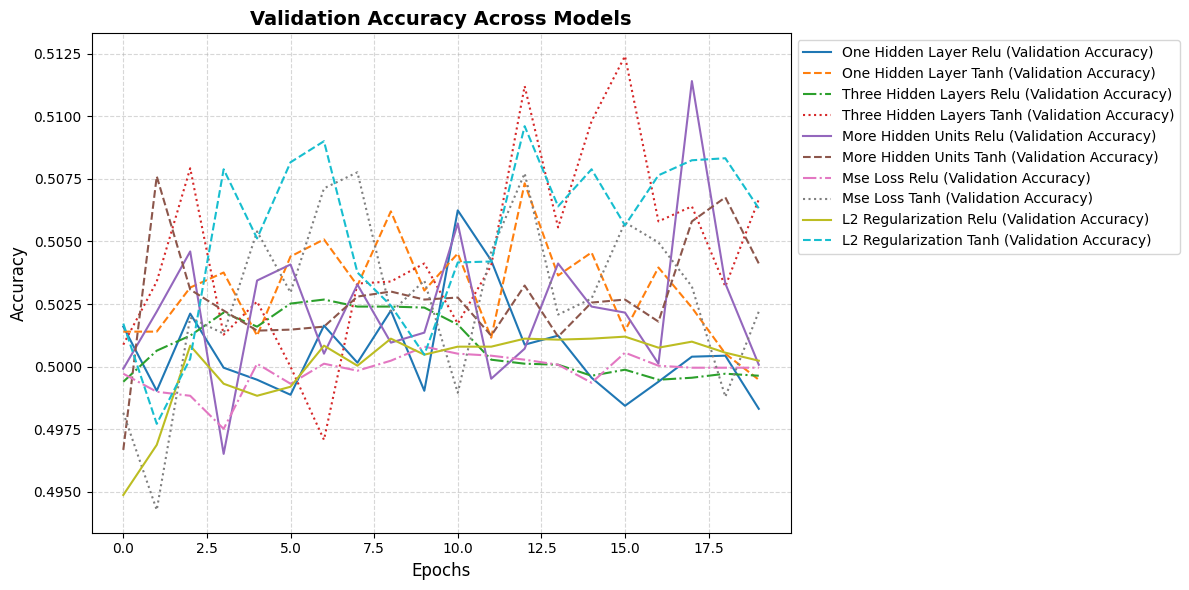

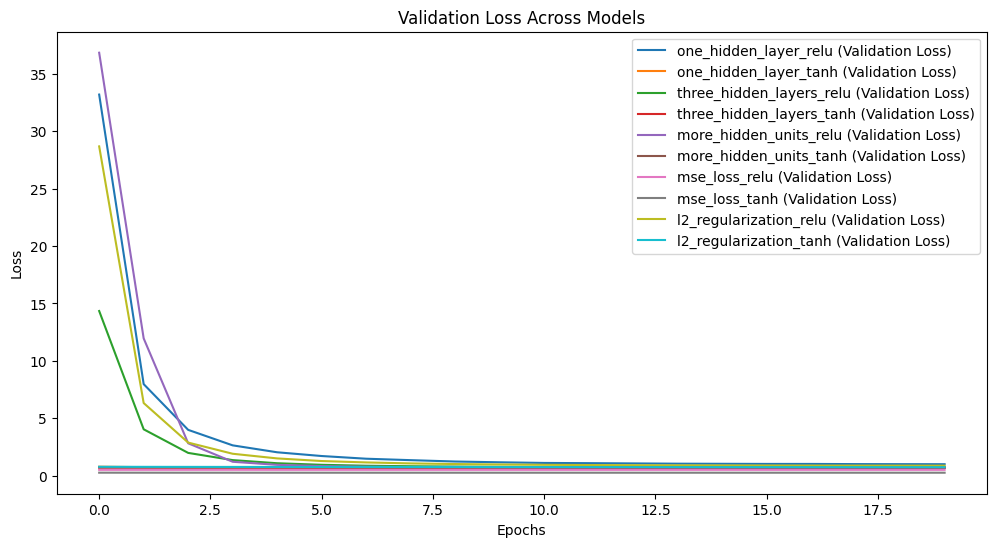

                      Model  Final Validation Accuracy
0     one_hidden_layer_relu                    0.49832
1     one_hidden_layer_tanh                    0.49948
2  three_hidden_layers_relu                    0.49964
3  three_hidden_layers_tanh                    0.50668
4    more_hidden_units_relu                    0.50008
5    more_hidden_units_tanh                    0.50412
6             mse_loss_relu                    0.49996
7             mse_loss_tanh                    0.50220
8    l2_regularization_relu                    0.50024
9    l2_regularization_tanh                    0.50632


<Figure size 1200x600 with 0 Axes>

In [3]:

# Improved visualization function
def plot_history_improved(histories):
    plt.figure(figsize=(12, 6))

    # Define colors and line styles for better readability
    color_palette = plt.cm.get_cmap("tab10", len(histories))  # Use tab10 color palette
    line_styles = ['-', '--', '-.', ':']  # Different line styles for variety

    for idx, (model_name, history) in enumerate(histories.items()):
        plt.plot(history.history["val_accuracy"],
                 label=f"{model_name.replace('_', ' ').title()} (Validation Accuracy)",
                 linestyle=line_styles[idx % len(line_styles)],
                 color=color_palette(idx))

    plt.title("Validation Accuracy Across Models", fontsize=14, fontweight='bold')
    plt.xlabel("Epochs", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.legend(fontsize=10, loc="upper left", bbox_to_anchor=(1,1))
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Plot the improved visualization
plot_history_improved(histories)
# Function to plot history
def plot_history(histories):
    plt.figure(figsize=(12, 6))

    # Plot training and validation loss for all models
    for model_name, history in histories.items():
        plt.plot(history.history["val_loss"], label=f"{model_name} (Validation Loss)")

    plt.title("Validation Loss Across Models")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 6))


# Plot results for all models
plot_history(histories)

# Extract final validation accuracies for comparison
final_accuracies = {model_name: history.history["val_accuracy"][-1] for model_name, history in histories.items()}

# Display the final validation accuracies as a DataFrame
results_df = pd.DataFrame(list(final_accuracies.items()), columns=["Model", "Final Validation Accuracy"])
print(results_df)


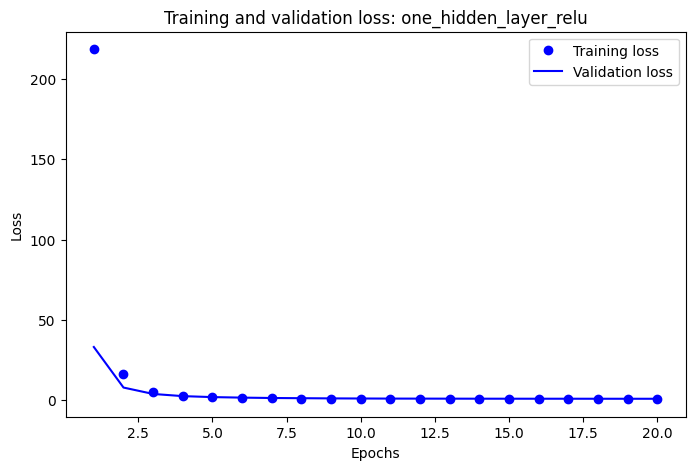

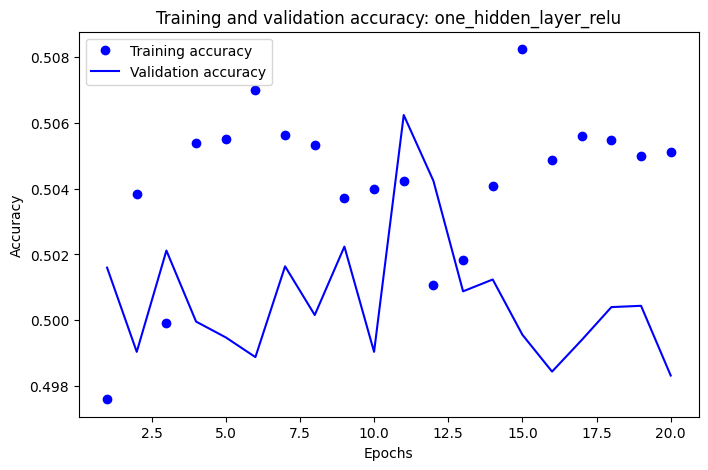

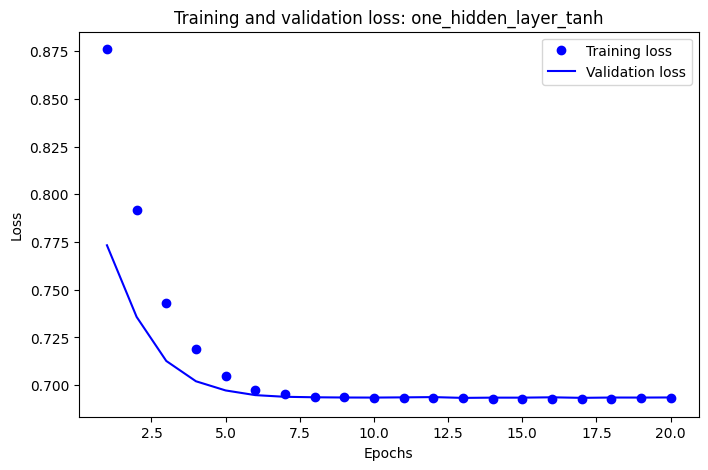

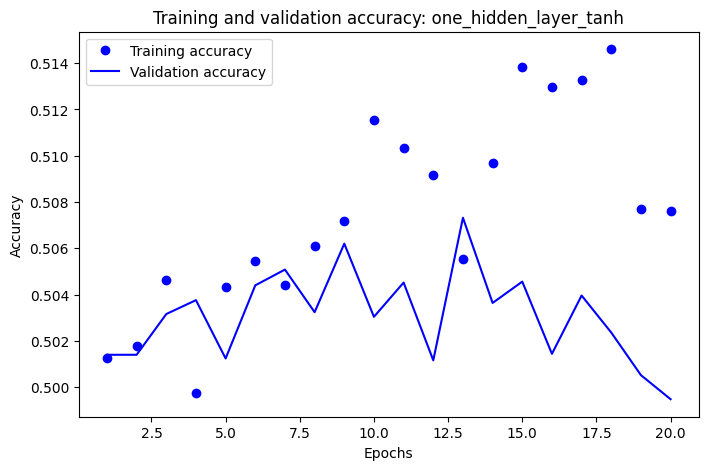

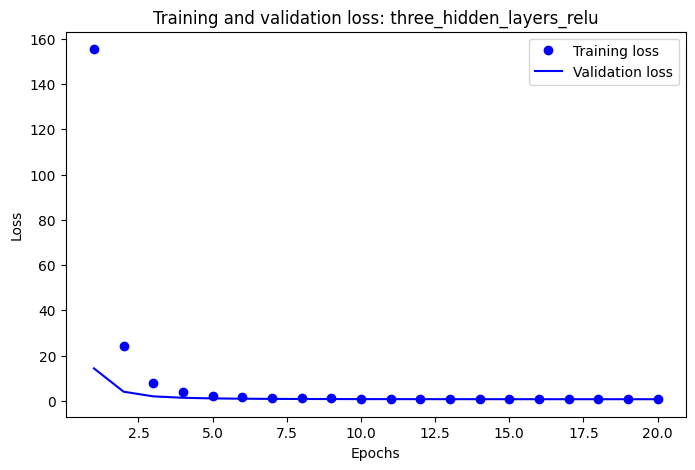

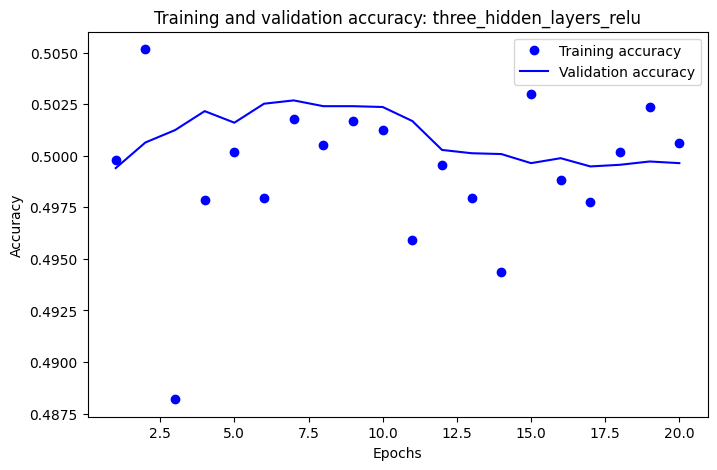

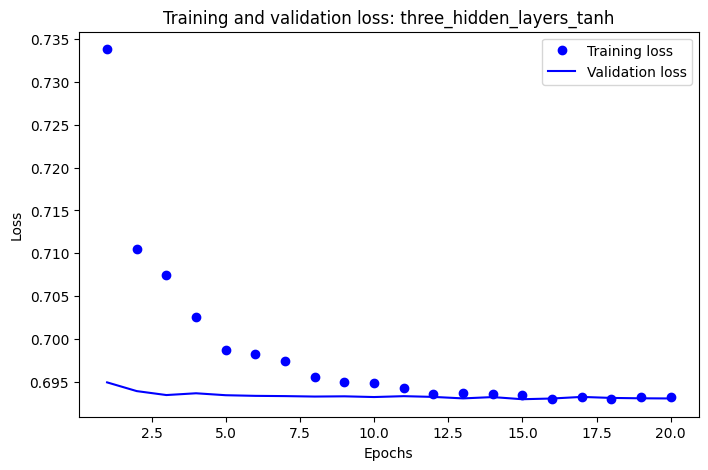

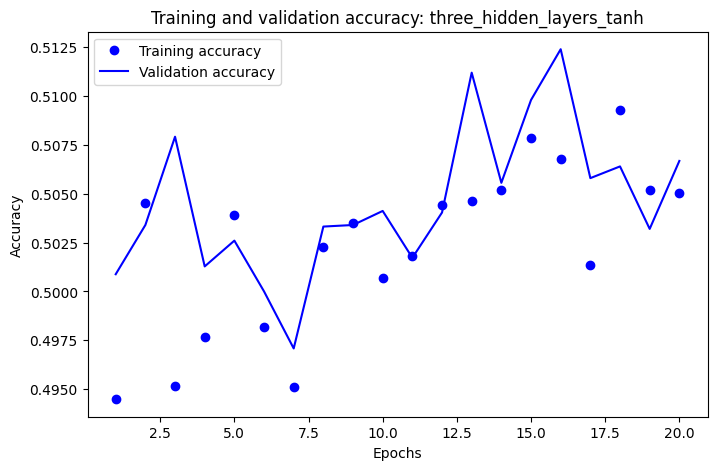

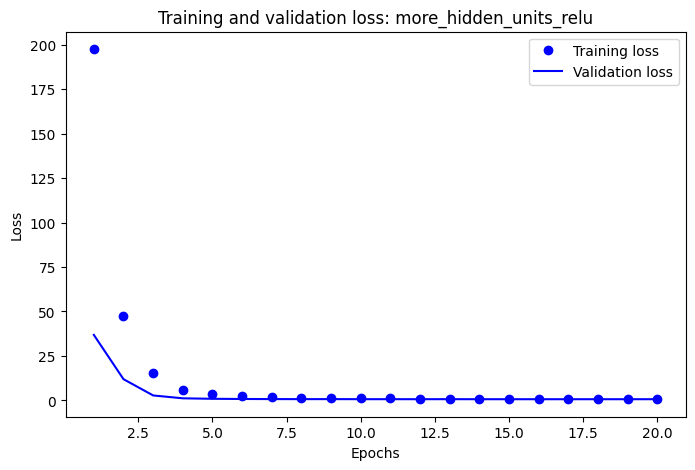

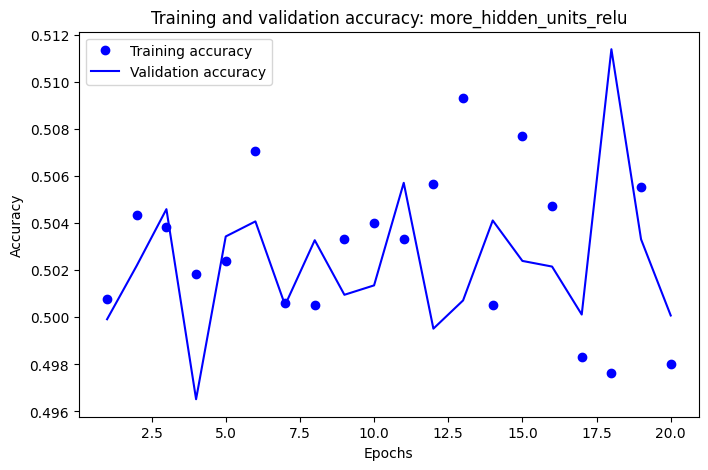

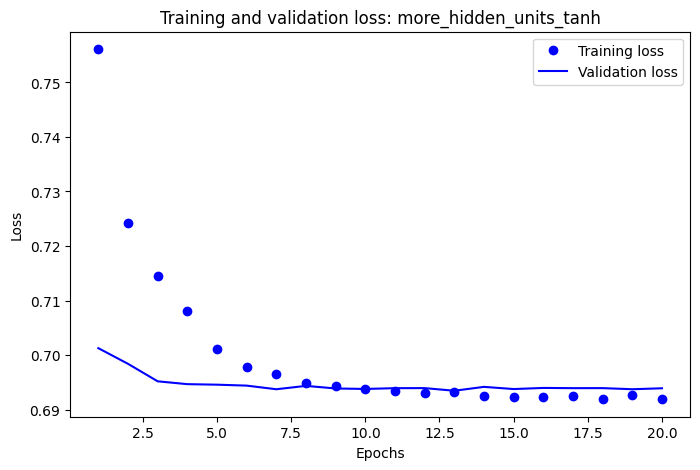

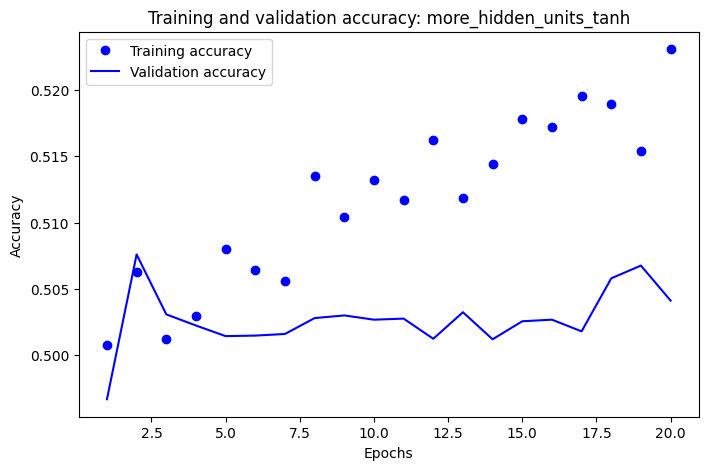

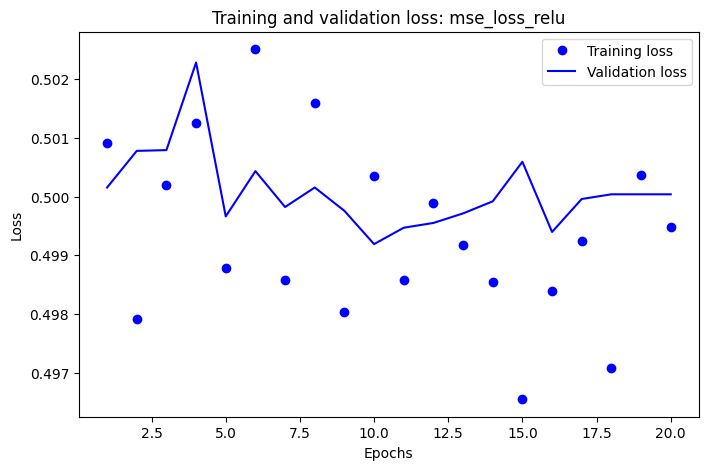

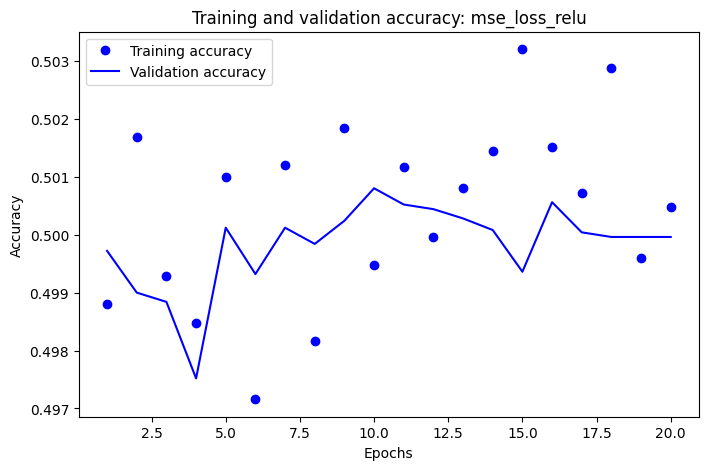

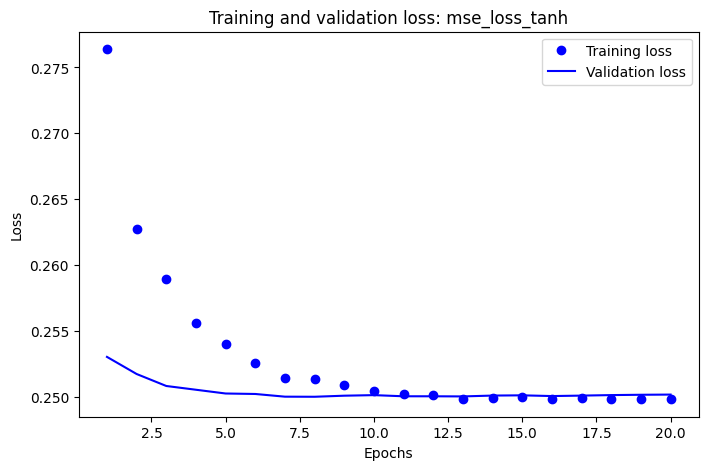

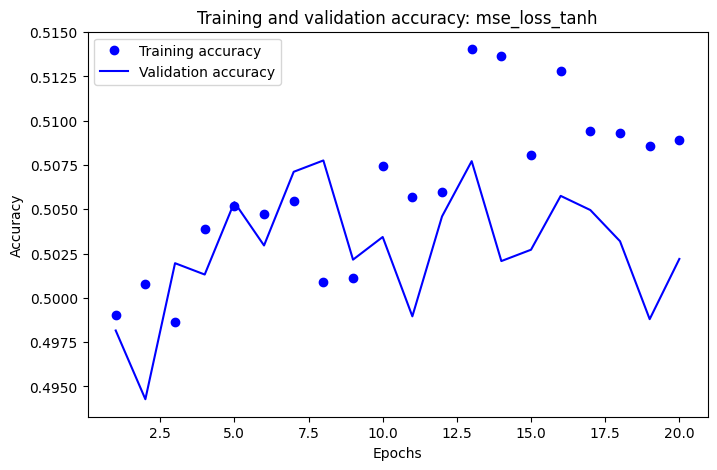

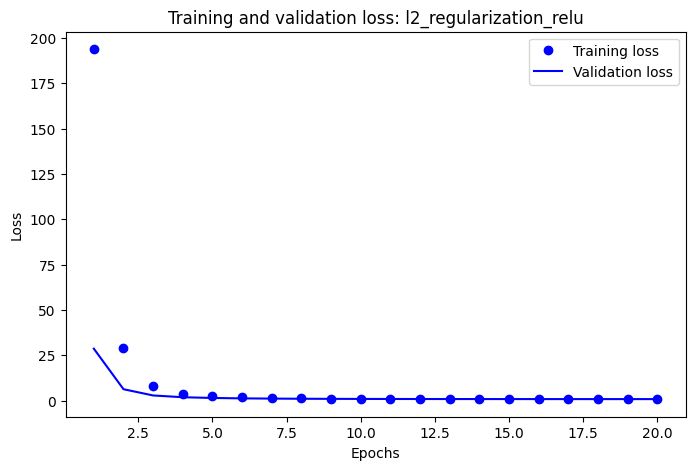

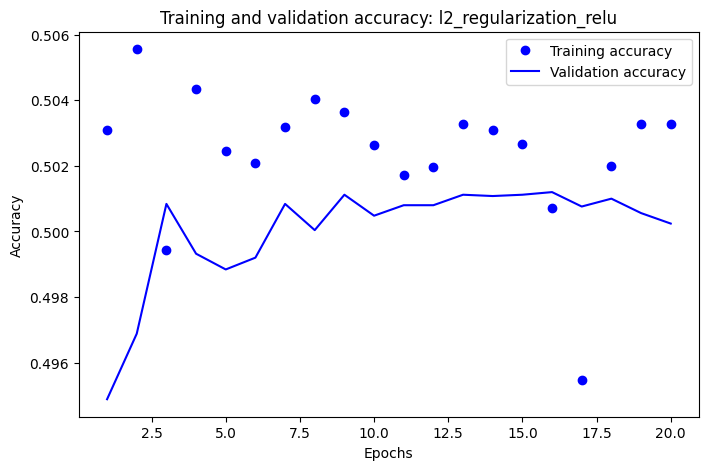

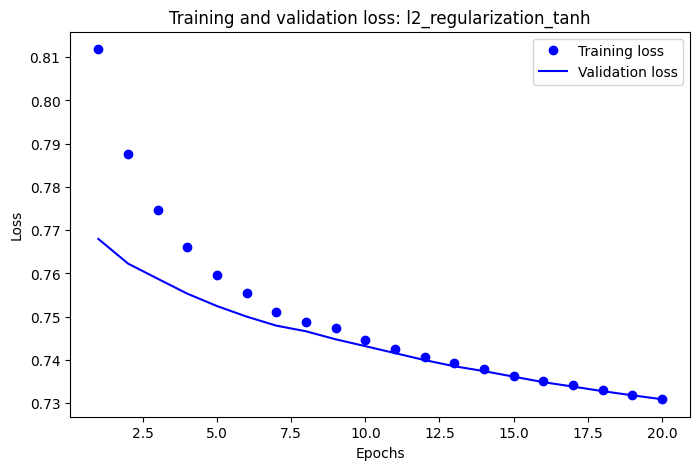

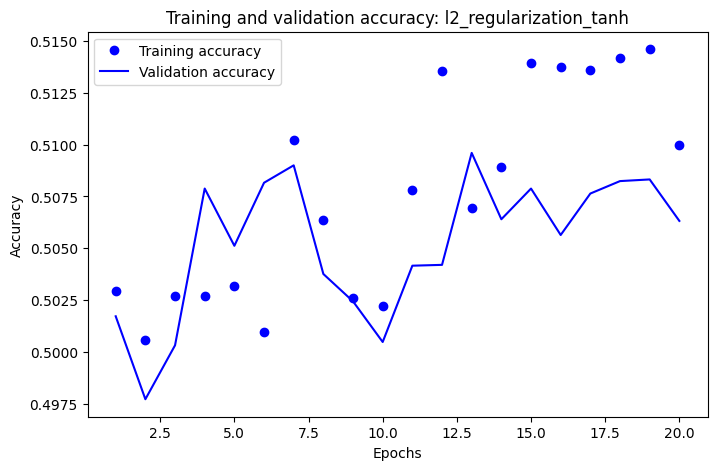

In [4]:

# Function to plot history
def plot_history(history, title):
    history_dict = history.history
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]
    acc = history_dict.get("accuracy", None)
    val_acc = history_dict.get("val_accuracy", None)
    epochs = range(1, len(loss_values) + 1)

    # Plot training and validation loss
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, loss_values, "bo", label="Training loss")
    plt.plot(epochs, val_loss_values, "b", label="Validation loss")
    plt.title(f"Training and validation loss: {title}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    # If accuracy is available, plot training and validation accuracy
    if acc and val_acc:
        plt.figure(figsize=(8, 5))
        plt.plot(epochs, acc, "bo", label="Training accuracy")
        plt.plot(epochs, val_acc, "b", label="Validation accuracy")
        plt.title(f"Training and validation accuracy: {title}")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()

# Plot results for all models
for model_name, history in histories.items():
    plot_history(history, model_name)

# Extract final validation accuracies for comparison
final_accuracies = {model_name: history.history["val_accuracy"][-1] for model_name, history in histories.items()}

